<a href="https://colab.research.google.com/github/vidhi9828/machine-learning/blob/main/VIDHI_SHARMA_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# This BELOW code defines a function loadCSV(filename) that reads a CSV file and stores its contents as a list. It then iterates through each row, converting all values to floating-point numbers. Finally, the dataset is returned as a NumPy array for further processing.

In [8]:
def loadCSV(filename):
    '''
    function to load dataset
    '''
    with open(filename,"r") as csvfile:
        lines = csv.reader("/content/MACHINE-LEARNING/dataset1 (2).csv")
        dataset = list(lines)
        for i in range(len(dataset)):
            dataset[i] = [float(x) for x in dataset[i]]
    return np.array(dataset)


**This script defines a function normalize(X) to normalize the feature matrix X. It calculates the minimum and maximum values for each feature, computes the range, and scales the data to a normalized range between 0 and 1. The function returns the normalized feature matrix for further processing.**




In [9]:
def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X

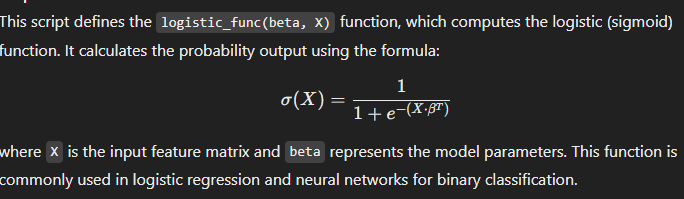

In [10]:

def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    # below is the code for 1/1+e^(-(bo*x1+ b1*x2 +  b1*x3............ ))
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))

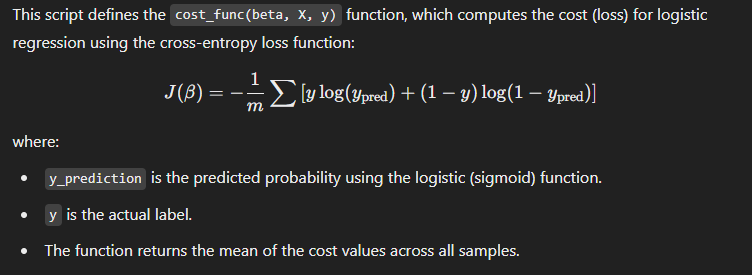

In [11]:
def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    #y_prediction=  1/1+e^(-(bo*x1+ b1*x2 +  b1*x3............ )) for all samples
    y_prediction= logistic_func(beta, X)
    y = np.squeeze(y)
    # calculate cross entropy cost function for all samples
    cost_function = -(y * np.log(y_prediction)) - ((1 - y) * np.log(1 - y_prediction) )
    # return the sum of  cost function divided by no. of samples
    return np.mean(cost_function)

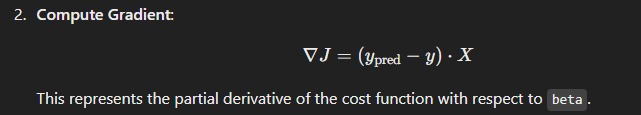

In [12]:
def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    #first_calc = y_prediction - y_actual  for all samples
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    # now in below step we will find the partial derivative
    #final_calc= gradient is (y_prediction - y_actual)*x  for all samples
    final_calc = np.dot(first_calc.T, X)

    return final_calc


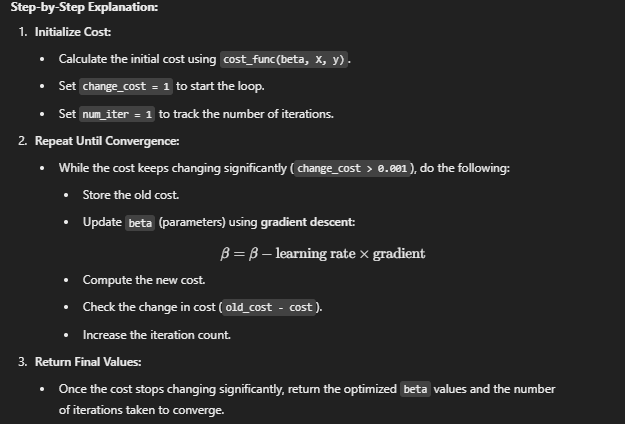

In [ ]:
def train(X, y, beta, lr=.01, converge_change=.001):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y)
    change_cost = 1
    num_iter = 1

    while(change_cost > converge_change):
        old_cost = cost
        #beta= beta - learning_rate * partial derivative of cost function w.r.t beta
        beta = beta - (lr * log_gradient(beta, X, y))
        # again calculate cost function
        cost = cost_func(beta, X, y)
        # find difference between old cost and new cost
        #if change is greater than .001 then reiterate
        change_cost = old_cost - cost
        num_iter += 1

    return beta, num_iter


Predicts labels (0 or 1) using logistic regression with learned beta values. Computes probabilities with logistic_func(beta, X), then assigns 1 if ≥ 0.5, else 0. Returns a squeezed array of predictions.

In [ ]:
def pred_values(beta, X):
    '''
    function to predict labels
    '''
    pred_prob = logistic_func(beta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value)

# New Section Containing the Entire Code


In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt



def loadCSV(filename):
    '''
    function to load dataset
    '''
    with open(filename,"r") as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for i in range(len(dataset)):
            dataset[i] = [float(x) for x in dataset[i]]
    return np.array(dataset)


def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X


def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    # below is the code for 1/1+e^(-(bo*x1+ b1*x2 +  b1*x3............ ))
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))


def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    #first_calc = y_prediction - y_actual  for all samples
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    # now in below step we will find the partial derivative
    #final_calc= gradient is (y_prediction - y_actual)*x  for all samples
    final_calc = np.dot(first_calc.T, X)

    return final_calc


def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    #y_prediction=  1/1+e^(-(bo*x1+ b1*x2 +  b1*x3............ )) for all samples
    y_prediction= logistic_func(beta, X)
    y = np.squeeze(y)
    # calculate cross entropy cost function for all samples
    cost_function = -(y * np.log(y_prediction)) - ((1 - y) * np.log(1 - y_prediction) )
    # return the sum of  cost function divided by no. of samples
    return np.mean(cost_function)


def train(X, y, beta, lr=.01, converge_change=.001):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y)
    change_cost = 1
    num_iter = 1

    while(change_cost > converge_change):
        old_cost = cost
        #beta= beta - learning_rate * partial derivative of cost function w.r.t beta
        beta = beta - (lr * log_gradient(beta, X, y))
        # again calculate cost function
        cost = cost_func(beta, X, y)
        # find difference between old cost and new cost
        #if change is greater than .001 then reiterate
        change_cost = old_cost - cost
        num_iter += 1

    return beta, num_iter


def pred_values(beta, X):
    '''
    function to predict labels
    '''
    pred_prob = logistic_func(beta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value)


def plot_reg(X, y, beta):
    '''
    function to plot decision boundary
    '''
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]

    # plotting points with diff color for diff label
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')

    # plotting decision boundary
    x1 = np.arange(0, 1, 0.1)
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
    plt.plot(x1, x2, c='k', label='reg line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()



if __name__ == "__main__":
    # load the dataset
    dataset = loadCSV('/content/sample_data/dataset1 (2).csv')

    # normalizing feature matrix
    X = normalize(dataset[:, :-1])
    print(X)

    # stacking columns wth all ones in feature matrix
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
    print(X)

    # response vector
    y = dataset[:, -1]

    # initial beta values
    beta = np.matrix(np.zeros(X.shape[1]))

    # beta values after running gradient descent
    beta, num_iter =train(X, y, beta)

    # estimated beta values and number of iterations
    print("Estimated regression coefficients:", beta)
    print("No. of iterations:", num_iter)

    # predicted labels
    y_pred = pred_values(beta, X)

    # number of correctly predicted labels
    print("Correctly predicted labels:", np.sum(y == y_pred))

    # plotting regression line
    plot_reg(X, y, beta)